In [150]:
import numpy as np
from matplotlib import pyplot as plt
size = 50

In [151]:
def error(M, A):
    return np.sum(np.square(M-A))

In [152]:
A = np.random.rand(size,size) + 7
A

array([[7.90796232, 7.8377431 , 7.24148284, ..., 7.19806146, 7.07091642,
        7.14770334],
       [7.44542933, 7.3054252 , 7.13386123, ..., 7.77811336, 7.05371154,
        7.20792965],
       [7.41095275, 7.70170981, 7.84405504, ..., 7.90784956, 7.91688685,
        7.94047424],
       ...,
       [7.68225011, 7.07896438, 7.27179186, ..., 7.75479718, 7.45043712,
        7.06258401],
       [7.33415827, 7.31762589, 7.36002577, ..., 7.64128078, 7.15611778,
        7.9633409 ],
       [7.63754119, 7.62068761, 7.85687979, ..., 7.72254676, 7.55762748,
        7.08576337]])

In [153]:
U, d, V = np.linalg.svd(A, full_matrices=True)
U = np.transpose(U)

In [154]:
d

array([3.74785086e+02, 3.89405995e+00, 3.67255233e+00, 3.62441273e+00,
       3.56401267e+00, 3.29716711e+00, 3.21293627e+00, 3.12960427e+00,
       3.00390746e+00, 2.96547956e+00, 2.81333768e+00, 2.78555826e+00,
       2.69988928e+00, 2.58607578e+00, 2.54883950e+00, 2.40270443e+00,
       2.23213442e+00, 2.18371095e+00, 2.14754384e+00, 2.10949552e+00,
       2.00869242e+00, 1.89967732e+00, 1.81932784e+00, 1.74988058e+00,
       1.70338068e+00, 1.66181736e+00, 1.49275323e+00, 1.47023164e+00,
       1.40853211e+00, 1.31598908e+00, 1.22410457e+00, 1.14542162e+00,
       1.12746654e+00, 1.05891068e+00, 9.55916770e-01, 8.79138800e-01,
       8.61812147e-01, 8.14193936e-01, 6.90311384e-01, 6.57561157e-01,
       5.79559144e-01, 5.37386219e-01, 4.58169049e-01, 3.65613220e-01,
       3.42443187e-01, 3.11960458e-01, 2.43109011e-01, 1.48266116e-01,
       1.03569852e-01, 4.48175743e-02])

In [155]:

approx = d[0] * np.outer(U[0] , V[0])
errorSvd = error(approx, A)
print("smallest error svd    : %f"  % errorSvd)


smallest error svd    : 202.295276


In [156]:
bestE = np.inf
bestU = None
bestV = None
bestd = None
errs = []
for _ in range(int(10e2)):
    UU = np.random.rand(size)
    UU = (1.0 / np.sqrt(error(UU, 0))) * UU
    VV = np.random.rand(size)
    VV = (1.0 / np.sqrt(error(VV, 0))) * VV
    for dd in np.linspace(0.1, 10, num=100):
        app = dd * np.outer(UU,VV)
        err = error(app, A)
        errs.append(err)
        if err < bestE:
            bestE = err
            bestU = UU 
            bestV = VV
            bestd = dd
print("smallest error svd    : %f"  % errorSvd)
print("smallest error random : %f"  % bestE)

smallest error svd    : 202.295276
smallest error random : 134494.033334


In [157]:
bestd * np.outer(bestU , bestV)

array([[0.14348821, 0.20350607, 0.27027374, ..., 0.18288452, 0.37947446,
        0.50725974],
       [0.13390785, 0.18991848, 0.25222823, ..., 0.17067377, 0.35413789,
        0.47339126],
       [0.09663543, 0.13705584, 0.18202206, ..., 0.12316778, 0.25556579,
        0.34162572],
       ...,
       [0.09944031, 0.14103395, 0.18730533, ..., 0.12674278, 0.2629837 ,
        0.35154157],
       [0.0671673 , 0.09526185, 0.12651601, ..., 0.08560884, 0.17763323,
        0.23744993],
       [0.11460192, 0.16253731, 0.21586366, ..., 0.14606718, 0.30308068,
        0.40514091]])

In [158]:
approx

array([[7.50446433, 7.41976171, 7.35303143, ..., 7.42004934, 7.43024669,
        7.3824611 ],
       [7.60677933, 7.52092188, 7.4532818 , ..., 7.52121344, 7.53154981,
        7.48311272],
       [7.63234043, 7.54619447, 7.47832711, ..., 7.54648701, 7.55685812,
        7.50825826],
       ...,
       [7.60418425, 7.51835609, 7.4507391 , ..., 7.51864755, 7.5289804 ,
        7.48055983],
       [7.54889369, 7.4636896 , 7.39656425, ..., 7.46397894, 7.47423666,
        7.42616816],
       [7.60583489, 7.5199881 , 7.45235643, ..., 7.52027963, 7.53061472,
        7.48218364]])

In [159]:
error(bestU, 0)

1.0

(array([ 1409.,  9657., 11231., 11163., 11152., 11078., 11061., 11003.,
        10975., 11271.]),
 array([134494.03333378, 135106.32934988, 135718.62536597, 136330.92138207,
        136943.21739817, 137555.51341427, 138167.80943036, 138780.10544646,
        139392.40146256, 140004.69747866, 140616.99349476]),
 <BarContainer object of 10 artists>)

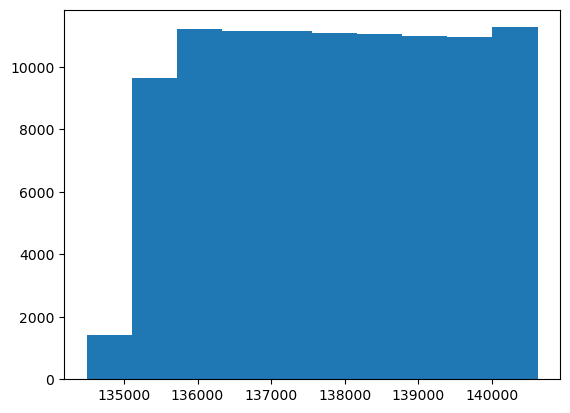

In [160]:
plt.hist(errs)

In [161]:
np.allclose(A,np.dot(U, np.dot(np.diag(d), V)))

False